📂 Upload indian_food.csv


Saving indian_food.csv to indian_food (2).csv
✅ Calories calculated & saved

📸 Upload food image (example: chole_bhature.jpg)


Saving jalebi.jpg to jalebi.jpg

📸 IMAGE SELECTED: jalebi.jpg

🍽 FOOD DETAILS
Name   : Jalebi
Diet   : vegetarian
Course : dessert
Region : North
State  : Uttar Pradesh
🔥 Estimated Calories: 160 kcal


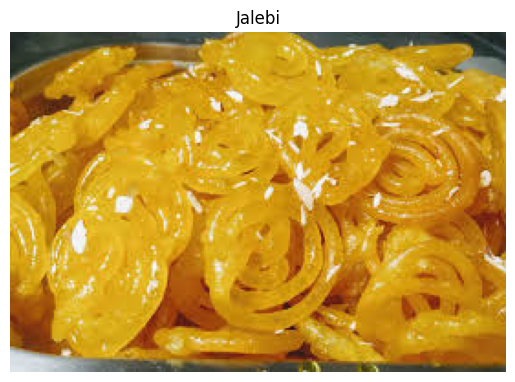

In [4]:
# ==============================
# IMPORT LIBRARIES
# ==============================
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from google.colab import files

# ==============================
# STEP 1: UPLOAD DATASET
# ==============================
print("📂 Upload indian_food.csv")
files.upload()

DATASET_PATH = "indian_food.csv"
df = pd.read_csv(DATASET_PATH)

# ==============================
# STEP 2: CALORIE ESTIMATION RULES
# ==============================
ingredient_calories = {
    "paneer": 320,
    "chicken": 250,
    "mutton": 300,
    "rice": 200,
    "dal": 180,
    "lentil": 180,
    "potato": 150,
    "oil": 120,
    "ghee": 140,
    "butter": 150,
    "cheese": 280,
    "sugar": 200,
    "milk": 120,
    "cream": 180,
    "flour": 160,
    "vegetable": 100
}

course_base_calories = {
    "snack": 180,
    "starter": 200,
    "main course": 350,
    "dessert": 300,
    "breakfast": 250
}

# ==============================
# STEP 3: CALORIE FUNCTION
# ==============================
def estimate_calories(row):
    ingredients = str(row["ingredients"]).lower()
    course = str(row["course"]).lower()

    calories = 0
    ingredient_found = False

    for item, value in ingredient_calories.items():
        if item in ingredients:
            calories += value
            ingredient_found = True

    if not ingredient_found:
        calories = course_base_calories.get(course, 250)

    if str(row["diet"]).lower() == "non vegetarian":
        calories += 50

    return calories

# ==============================
# STEP 4: ADD CALORIE COLUMN
# ==============================
if "estimated_calories_kcal" not in df.columns:
    df["estimated_calories_kcal"] = df.apply(estimate_calories, axis=1)
    df.to_csv("indian_food_with_calories.csv", index=False)

print("✅ Calories calculated & saved")

# ==============================
# STEP 5: UPLOAD FOOD IMAGE
# ==============================
print("\n📸 Upload food image (example: chole_bhature.jpg)")
image_upload = files.upload()

image_path = list(image_upload.keys())[0]

# ==============================
# STEP 6: FOOD NAME FROM IMAGE
# ==============================
food_name = os.path.splitext(image_path)[0]
food_name = food_name.replace("_", " ").lower()

# ==============================
# STEP 7: SMART MATCHING
# ==============================
match = df[df["name"].str.lower().str.contains(food_name)]

print("\n📸 IMAGE SELECTED:", image_path)

# ==============================
# STEP 8: DISPLAY RESULT
# ==============================
if not match.empty:
    food = match.iloc[0]

    print("\n🍽 FOOD DETAILS")
    print("Name   :", food["name"])
    print("Diet   :", food["diet"])
    print("Course :", food["course"])
    print("Region :", food["region"])
    print("State  :", food["state"])
    print("🔥 Estimated Calories:", food["estimated_calories_kcal"], "kcal")

else:
    print("\n⚠ Food not found in dataset")
    print("Detected name:", food_name)

# ==============================
# STEP 9: SHOW IMAGE
# ==============================
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")
plt.title(food_name.title())
plt.show()
